In [1]:
pip install gwpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 87.9 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 43.0.3
    Uninstalling cryptography-43.0.3:
      Successfully uninstalled cryptography-43.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyopenssl 24.2.1 requires cryptography<44,>=41.0.5, but you have cryptography 46.0.3 which is incompatible.
pydrive2 1.21.3 requires cryptography<44, but you have cryptography 46.0.3 which is incompatible.


In [2]:
pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.7/182.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 MB 17.6 MB/s eta 0:00:00
  Created wheel for pegasus-wms.api: filename=pegasus_wms.api-5.1.1-py3-none-any.whl size=51367 

In [3]:
pip install gwosc

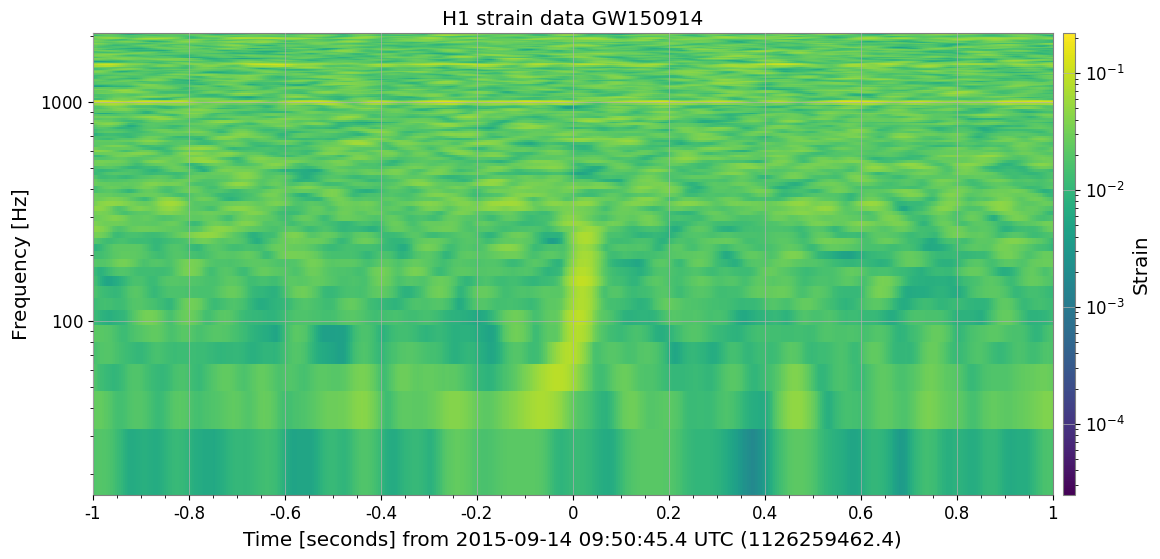

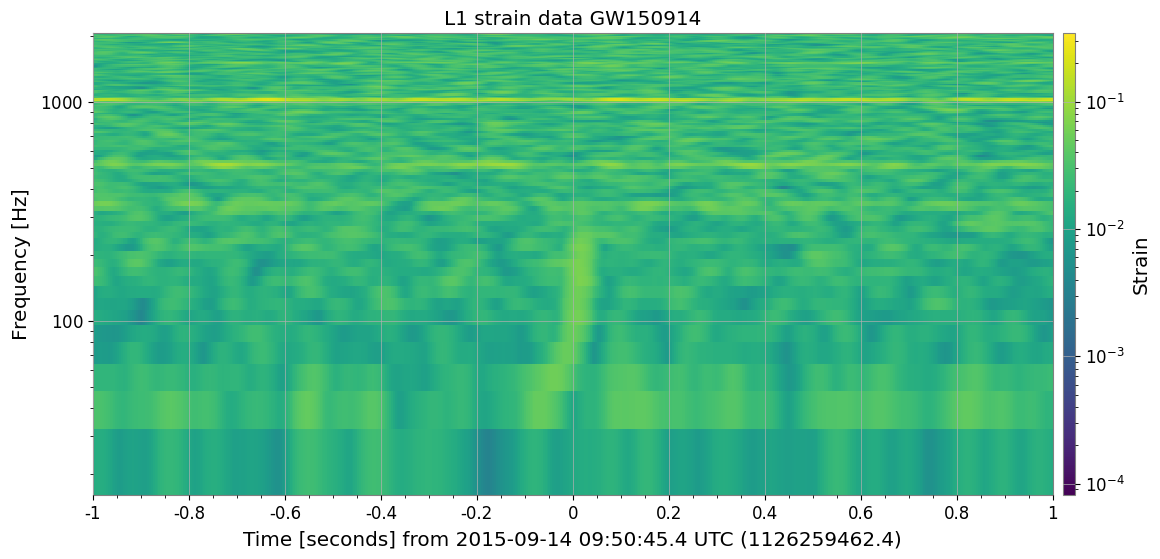

In [15]:
import gwosc.datasets as g
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot
from gwpy.signal import filter_design

event = 'GW150914-v1'
gps = g.event_gps(event)
dat_1 = TimeSeries.fetch_open_data("H1", gps-5, gps+5)
dat_2 = TimeSeries.fetch_open_data("L1", gps-5,gps+5)


white_1 = dat_1.whiten(4,2)
white_2 = dat_2.whiten(4,2)
band = filter_design.highpass(20, white_1.sample_rate)     #frequencies from Ann. Phys. (Berlin) 529, No. 1–2, 1600209 (2017) / DOI 10.1002/andp.201600209
not_ = [filter_design.notch(f, white_1.sample_rate) for f in [60,120,180]]
com = filter_design.concatenate_zpks(band, *not_)

dat_1f = white_1.filter(com,filtfilt=True)
dat_2f = white_2.filter(com,filtfilt=True)

spec_1 = dat_1f.spectrogram2(fftlength=1/16., overlap=15/256.) ** (1/2.)
spec_2 = dat_2f.spectrogram2(fftlength=1/16., overlap=15/256.) ** (1/2.)

spec_1 = spec_1.crop_frequencies(20)
spec_2 = spec_2.crop_frequencies(20)

plot = spec_1.plot(norm="log", cmap="viridis", yscale="log", epoch = gps)
ax = plot.gca()
ax.set_title("H1 strain data GW150914")
ax.set_xlim(gps-1,gps+1)
ax.colorbar(label="Strain")
plot.show()

plot = spec_2.plot(norm="log", cmap="viridis", yscale="log", epoch = gps)
ax = plot.gca()
ax.set_title("L1 strain data GW150914")
ax.set_xlim(gps-1,gps+1)
ax.colorbar(label="Strain")
plot.show()

